# Caspar's notebook

Scrape some images?

In [70]:
# ! pip install beautifulsoup4 requests pandas


In [71]:
# import requests
# from bs4 import BeautifulSoup
# import pandas as pd

# # URL to scrape
# url = 'https://pokemondb.net/evolution'

# # Send a GET request to the URL
# response = requests.get(url)

# if response.status_code == 200:
#     soup = BeautifulSoup(response.content, 'html.parser')
#     infocard_lists = soup.find_all(class_='infocard-list-evo')

#     # Prepare a list to hold the scraped data
#     data = []

#     # Iterate over each infocard-list-evo
#     for infocard_list in infocard_lists:
#         # Iterate over each infocard within the list
#         for pokemon in infocard_list.find_all(class_='infocard'):
#             source_tag = pokemon.find('source')
#             if source_tag and 'srcset' in source_tag.attrs:
#                 # Get the first URL from srcset
#                 image_url = source_tag['srcset'].split()[0]
#             else:
#                 image_url = None  # or some default value

#             name_tag = pokemon.find('a', class_='ent-name')
#             if name_tag:
#                 name = name_tag.text
#             else:
#                 name = "Unknown"  # or some default value

#             type_tags = pokemon.find_all(class_='itype')
#             types = [type_.text for type_ in type_tags] if type_tags else []

#             data.append({
#                 'name': name,
#                 'image': image_url,
#                 'types': ', '.join(types)
#             })

#     # Convert the list to a DataFrame
#     pokemon_df = pd.DataFrame(data)

#     # Save the DataFrame to a CSV file
#     pokemon_df.to_csv('pokemon_data.csv', index=False)

#     # Display the first few rows of the DataFrame
#     print(pokemon_df.head())
# else:
#     print("Failed to scrape the page")


In [72]:
# pd.set_option('display.max_colwidth', None)  # or use a specific large number instead of None

# pokemon_df.head(20)


In [73]:
# # Print the first few image URLs to check their full length
# for url in pokemon_df['image'].head(10):
#     print(url)


In [74]:
# https://img.pokemondb.net/artwork/ivysaur.jpg


Clean the scraped data

1 - duplicates

In [75]:
# # To view the duplicate rows
# duplicate_rows = pokemon_df[pokemon_df.duplicated()]

# print(duplicate_rows)


In [76]:
# # Filter out rows where name is 'Unknown'
# filtered_df = pokemon_df[pokemon_df['name'] != 'Unknown']

# # Find duplicates in the filtered DataFrame
# duplicate_rows_filtered = filtered_df[filtered_df.duplicated()]

# # Display the duplicate rows
# print(duplicate_rows_filtered)


In [77]:
# # Filter out rows where the 'image' column is 'no_image_available.jpg' or None
# filtered_df = pokemon_df[pokemon_df['image'] != 'no_image_available.jpg']
# filtered_df = filtered_df[pokemon_df['name'] != 'Unknown']

# filtered_df = filtered_df[filtered_df['image'].notna()]

# print(filtered_df.head())


In [78]:
# # pokemon_df = pokemon_df.drop_duplicates()
# filtered_df.head()


check missing values

standardize data formats

In [79]:
# # Ensure names are capitalized
# pokemon_df['name'] = pokemon_df['name'].str.capitalize()


remove unnecessary columns

In [80]:
# Example: Drop a column if needed
# pokemon_df = pokemon_df.drop(columns=['unnecessary_column'])


split columns if needed

In [81]:
# Example: If you have a column that needs to be split
# pokemon_df[['part1', 'part2']] = pokemon_df['combined_column'].str.split(' ', expand=True)


Save to csv

In [82]:
# filtered_df.to_csv('pokemon_data_from_pokemondb_net_evolution_page.csv', index=False)


If I scrape other pages maybe there are other images too

In [83]:
# import requests
# from bs4 import BeautifulSoup
# import pandas as pd

# # Function to scrape individual Pokemon sprite page
# def scrape_pokemon_page(url):
#     response = requests.get(url)
#     soup = BeautifulSoup(response.content, 'html.parser')
#     pokemon_name = soup.find('h1').text.replace(' sprites', '')

#     sprites_data = []
#     # Iterate over each table row and extract sprite info
#     for row in soup.find_all('tr')[1:]:  # Skipping the header row
#         cells = row.find_all('td')
#         if len(cells) > 1:
#             # Assuming first cell is the generation info
#             generation = cells[0].text.strip()
#             for cell in cells[1:]:
#                 img_tag = cell.find('img')
#                 if img_tag and 'src' in img_tag.attrs:
#                     img_url = img_tag['src']
#                     sprites_data.append({'name': pokemon_name, 'generation': generation, 'image_url': img_url})
#     return sprites_data

# # Main URL
# base_url = 'https://pokemondb.net'
# sprites_url = base_url + '/sprites'

# # Get the main sprite page
# response = requests.get(sprites_url)
# soup = BeautifulSoup(response.content, 'html.parser')

# # Find all links to individual Pokemon sprite pages
# pokemon_links = [base_url + tag['href'] for tag in soup.select('a.infocard[href]')]

# # DataFrame to store all sprites
# all_sprites_df = pd.DataFrame()

# # Scrape each Pokemon's sprite page
# for link in pokemon_links:
#     pokemon_sprites = scrape_pokemon_page(link)
#     all_sprites_df = all_sprites_df.append(pokemon_sprites, ignore_index=True)

# # Display the DataFrame
# print(all_sprites_df.head())


In [84]:
# all_sprites_df
# all_sprites_df.to_csv('All sprites dataframe with image urls')


# THIS TAKES AN HOUR TO RUN
# BE CAREFUL IF UNCOMMENTING AND PLEASE RE COMMENT ONCE YOUVE DOWNLOADED THE IMAGES

In [85]:
# import requests
# import os
# import zipfile

# # Function to download an image and save it to a specified folder
# def download_image(url, folder_path, file_name):
#     response = requests.get(url)
#     if response.status_code == 200:
#         with open(os.path.join(folder_path, file_name), 'wb') as file:
#             file.write(response.content)
#     else:
#         print(f"Failed to download {url}")

# # Create a directory for the downloaded images
# images_folder = 'pokemon_sprites'
# os.makedirs(images_folder, exist_ok=True)

# # Assuming 'all_sprites_df' is your DataFrame and it has 'name' and 'image_url' columns
# for index, row in all_sprites_df.iterrows():
#     # Construct a file name for the image
#     file_name = f"{row['name']}_{index}.png"
#     # Download the image
#     download_image(row['image_url'], images_folder, file_name)

# # Create a ZIP file containing all the images
# zip_file_name = 'pokemon_sprites.zip'
# with zipfile.ZipFile(zip_file_name, 'w') as zipf:
#     for root, dirs, files in os.walk(images_folder):
#         for file in files:
#             zipf.write(os.path.join(root, file), file)

# # Delete the original images folder
# import shutil
# shutil.rmtree(images_folder)

# print("Images downloaded and zipped successfully.")


# Data preprocessing

## Load data into pandas df


In [86]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [87]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Emile
import os
from pathlib import Path

In [88]:
GCP_PROJECT_WAGON = os.environ.get("GCP_PROJECT_WAGON")
print(GCP_PROJECT_WAGON)
CATCH_PREDICT_CSV_FILE = os.environ.get("CATCH_PREDICT_CSV_FILE")
print(CATCH_PREDICT_CSV_FILE)

wagon-public-datasets
pokemon.csv


In [89]:
LOCAL_REGISTRY_PATH = os.path.join(
    os.path.expanduser("~"),
    "code",
    "mtthibault",
    "catchemall",
    "raw_data",
    "training_outputs"
)
LOCAL_REGISTRY_PATH

'/home/emile/code/mtthibault/catchemall/raw_data/training_outputs'

In [90]:
LOCAL_DATA_PATH = os.path.join(
    os.path.expanduser("~"), "code", "mtthibault", "catchemall", "raw_data"
)
LOCAL_DATA_PATH

'/home/emile/code/mtthibault/catchemall/raw_data'

In [91]:
data_query_cache_path = Path(LOCAL_DATA_PATH).joinpath(
    "prediction", CATCH_PREDICT_CSV_FILE
)
data_query_cache_path

PosixPath('/home/emile/code/mtthibault/catchemall/raw_data/prediction/pokemon.csv')

In [92]:
# type_csv = "/Users/lapiscine/code/CasparRitchie/casparcatchemall/pokemon.csv"
# Emile
type_csv = data_query_cache_path
pokemon_data = pd.read_csv(type_csv)
pokemon_data

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.50,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.50,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,5,80,65,80,fire,NaN,19.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,['Beast Boost'],0.25,1.0,0.5,2.0,0.5,1.0,2.0,0.5,1.0,...,NaN,797,107,101,61,steel,flying,999.9,7,1
796,['Beast Boost'],1.00,1.0,0.5,0.5,0.5,2.0,4.0,1.0,1.0,...,NaN,798,59,31,109,grass,steel,0.1,7,1
797,['Beast Boost'],2.00,0.5,2.0,0.5,4.0,2.0,0.5,1.0,0.5,...,NaN,799,97,53,43,dark,dragon,888.0,7,1
798,['Prism Armor'],2.00,2.0,1.0,1.0,1.0,0.5,1.0,1.0,2.0,...,NaN,800,127,89,79,psychic,NaN,230.0,7,1


## 1. Data Preparation

### (1) Check for Duplicates

In [93]:
# Check for duplicate rows
print(f"Number of duplicate rows: {pokemon_data.duplicated().sum()}")

# If duplicates are found, you can remove them using
# pokemon_data = pokemon_data.drop_duplicates()


Number of duplicate rows: 0


### (2) Handle Missing Data

In [94]:
# Check for missing values in each column
missing_values = pokemon_data.isna().sum()
print("Missing values per column:\n", missing_values)
# Depending on the context, you can handle missing data by dropping or imputing
# For example, to drop columns with more than 30% missing values
# threshold = 0.3 * len(pokemon_data)
# pokemon_data = pokemon_data.dropna(thresh=threshold, axis=1)

# Or to fill missing values with the mean (for numerical columns)
# pokemon_data.fillna(pokemon_data.mean(), inplace=True)


Missing values per column:
 abilities              0
against_bug            0
against_dark           0
against_dragon         0
against_electric       0
against_fairy          0
against_fight          0
against_fire           0
against_flying         0
against_ghost          0
against_grass          0
against_ground         0
against_ice            0
against_normal         0
against_poison         0
against_psychic        0
against_rock           0
against_steel          0
against_water          0
attack                 0
base_egg_steps         0
base_happiness         0
base_total             0
capture_rate           0
classfication          0
defense                0
experience_growth      0
height_m              20
hp                     0
japanese_name          0
name                   0
percentage_male       97
pokedex_number         0
sp_attack              0
sp_defense             0
speed                  0
type1                  0
type2                384
weight_kg             

# DECISION - comment traiter les manquants height and weight

In [95]:
# # Option 1: Fill missing values with mean
pokemon_data['height_m'].fillna(pokemon_data['height_m'].median(), inplace=True)
pokemon_data['weight_kg'].fillna(pokemon_data['weight_kg'].median(), inplace=True)

# Option 2: Drop rows with missing values
# pokemon_data.dropna(subset=['height_m', 'weight_kg'], inplace=True)


How to manage percentage male - can we drop this column? Does it influence the capture rate?

In [96]:
# Option 1: Fill missing values with median or a placeholder value
# pokemon_data['percentage_male'].fillna(pokemon_data['percentage_male'].median(), inplace=True)
# or
# pokemon_data['percentage_male'].fillna(-1, inplace=True)  # Placeholder for unknown

# Option 2: Drop the column
pokemon_data.drop(columns=['percentage_male'], inplace=True)


### We need to create a column called catchability which uses /2.55 to work out the % score for catchability (we might adjust this formula later)

In [97]:
# Convert capture_rate to numeric, coercing errors
pokemon_data['capture_rate'] = pd.to_numeric(pokemon_data['capture_rate'], errors='coerce')


In [98]:
# Create the new column 'catchability'
pokemon_data['catchability'] = pokemon_data['capture_rate'] / 2.55
# Check for missing values in catchability
missing_catchability = pokemon_data['catchability'].isnull().sum()
print(f"Missing values in catchability: {missing_catchability}")

# Remove rows where catchability is NaN
pokemon_data = pokemon_data.dropna(subset=['catchability'])

# Check again for missing values
missing_catchability = pokemon_data['catchability'].isnull().sum()
print(f"Missing values in catchability after removal: {missing_catchability}")


pokemon_data = pokemon_data.drop(columns=['capture_rate'])

# Check the first few rows to confirm the new column is added correctly
print(pokemon_data[['catchability']].head())


Missing values in catchability: 0
Missing values in catchability after removal: 0
   catchability
0     17.647059
1     17.647059
2     17.647059
3     17.647059
4     17.647059


# How to treat types. Different approach - concatenate then encode to ensure all combinations are covered

First fillna with None to ensure no missing values, then combine to a combined_type column

In [99]:
pokemon_data['type2'].fillna('None', inplace=True)
pokemon_data['combined_type'] = pokemon_data['type1'] + "_" + pokemon_data['type2']


In [100]:
# Check if there are NaN values in 'combined_type' column
print(f"Missing values in combined_type: {pokemon_data['combined_type'].isnull().sum()}")


Missing values in combined_type: 0


In [101]:
# print(f"Rows in original data: {pokemon_data.shape[0]}")
# print(f"Rows in encoded data: {encoded_columns.shape[0]}")


In [102]:
# # Reset index if necessary
# pokemon_data.reset_index(drop=True, inplace=True)
# encoded_columns.reset_index(drop=True, inplace=True)

# # Concatenate again
# pokemon_data = pd.concat([pokemon_data, encoded_columns], axis=1)


In [103]:
missing_values_after = pokemon_data.isnull().sum()
print(missing_values_after)


abilities            0
against_bug          0
against_dark         0
against_dragon       0
against_electric     0
against_fairy        0
against_fight        0
against_fire         0
against_flying       0
against_ghost        0
against_grass        0
against_ground       0
against_ice          0
against_normal       0
against_poison       0
against_psychic      0
against_rock         0
against_steel        0
against_water        0
attack               0
base_egg_steps       0
base_happiness       0
base_total           0
classfication        0
defense              0
experience_growth    0
height_m             0
hp                   0
japanese_name        0
name                 0
pokedex_number       0
sp_attack            0
sp_defense           0
speed                0
type1                0
type2                0
weight_kg            0
generation           0
is_legendary         0
catchability         0
combined_type        0
dtype: int64


then encode the new column and drop previous columns

In [104]:
from sklearn.preprocessing import OneHotEncoder

# One-Hot Encoding the combined types
encoder = OneHotEncoder(sparse=False)  # sparse=False ensures the output is a dense array
combined_type_encoded = encoder.fit_transform(pokemon_data[['combined_type']])

# Creating a DataFrame with encoded columns
encoded_columns = pd.DataFrame(combined_type_encoded, columns=encoder.get_feature_names_out(['combined_type']))

# Concatenating the encoded columns with the original DataFrame
pokemon_data = pd.concat([pokemon_data, encoded_columns], axis=1)

# Drop the original 'type1', 'type2', and 'combined_type' columns if they are no longer needed
pokemon_data.drop(columns=['type1', 'type2', 'combined_type'], inplace=True)
pokemon_data


/home/emile/.pyenv/versions/3.10.6/envs/catchemall/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,combined_type_water_fighting,combined_type_water_flying,combined_type_water_ghost,combined_type_water_grass,combined_type_water_ground,combined_type_water_ice,combined_type_water_poison,combined_type_water_psychic,combined_type_water_rock,combined_type_water_steel
0,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,"['Blaze', 'Solar Power']",0.50,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,"['Blaze', 'Solar Power']",0.50,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,['Beast Boost'],0.25,1.0,0.5,2.0,0.5,1.0,2.0,0.5,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
796,['Beast Boost'],1.00,1.0,0.5,0.5,0.5,2.0,4.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
797,['Beast Boost'],2.00,0.5,2.0,0.5,4.0,2.0,0.5,1.0,0.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
798,['Prism Armor'],2.00,2.0,1.0,1.0,1.0,0.5,1.0,1.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [105]:
# Check for missing values in each column
missing_values = pokemon_data.isnull().sum()
print(missing_values)

# Optionally, to check if there are any missing values in the entire dataset
total_missing = missing_values.sum()
print(f"Total missing values in the dataset: {total_missing}")


abilities                      0
against_bug                    0
against_dark                   0
against_dragon                 0
against_electric               0
                              ..
combined_type_water_ice        0
combined_type_water_poison     0
combined_type_water_psychic    0
combined_type_water_rock       0
combined_type_water_steel      0
Length: 204, dtype: int64
Total missing values in the dataset: 0


In [120]:
pokemon_data.keys()

Index(['abilities', 'against_bug', 'against_dark', 'against_dragon',
       'against_electric', 'against_fairy', 'against_fight', 'against_fire',
       'against_flying', 'against_ghost',
       ...
       'combined_type_water_fighting', 'combined_type_water_flying',
       'combined_type_water_ghost', 'combined_type_water_grass',
       'combined_type_water_ground', 'combined_type_water_ice',
       'combined_type_water_poison', 'combined_type_water_psychic',
       'combined_type_water_rock', 'combined_type_water_steel'],
      dtype='object', length=204)

In [106]:
pokemon_data


,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,combined_type_water_fighting,combined_type_water_flying,combined_type_water_ghost,combined_type_water_grass,combined_type_water_ground,combined_type_water_ice,combined_type_water_poison,combined_type_water_psychic,combined_type_water_rock,combined_type_water_steel
0,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,"['Blaze', 'Solar Power']",0.50,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,"['Blaze', 'Solar Power']",0.50,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,['Beast Boost'],0.25,1.0,0.5,2.0,0.5,1.0,2.0,0.5,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
796,['Beast Boost'],1.00,1.0,0.5,0.5,0.5,2.0,4.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
797,['Beast Boost'],2.00,0.5,2.0,0.5,4.0,2.0,0.5,1.0,0.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
798,['Prism Armor'],2.00,2.0,1.0,1.0,1.0,0.5,1.0,1.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### (3) Identify and handle Outliers

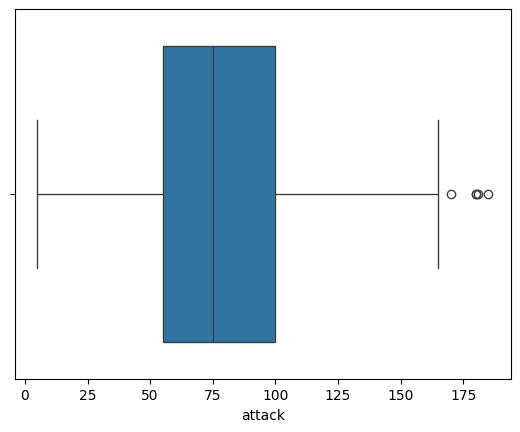

In [107]:
# For numerical columns, you can use boxplots to visualize outliers
import seaborn as sns
import matplotlib.pyplot as plt

# Example for a numerical column, e.g., 'attack'
sns.boxplot(x=pokemon_data['attack'])
plt.show()

# Depending on the analysis, you can remove or cap outliers
# For instance, removing outliers beyond 3 standard deviations
# mean_attack = pokemon_data['attack'].mean()
# std_attack = pokemon_data['attack'].std()
# pokemon_data = pokemon_data[(pokemon_data['attack'] < mean_attack + 3 * std_attack) &
#                             (pokemon_data['attack'] > mean_attack - 3 * std_attack)]


### (4) Scaling numerical columns

In [108]:
from sklearn.preprocessing import StandardScaler

# Scaling numerical features - example with 'attack' and 'defense'
scaler = StandardScaler()
pokemon_data[['attack', 'defense']] = scaler.fit_transform(pokemon_data[['attack', 'defense']])


## 2. Sklearn modelling workflow

Choose a target variable for the model and split features (X) and target (y)

In [109]:
# Example target variable
y = pokemon_data['catchability']  # Adjust according to your target variable
X = pokemon_data.drop('catchability', axis=1)  # Drop the target variable from features


Remove non-numerical columns


In [110]:
X = X.select_dtypes(include=[np.number])


If we want, we can encode the non-numerical columns

In [111]:
# from sklearn.preprocessing import OneHotEncoder

# # Selecting only categorical columns
# categorical_cols = X.select_dtypes(include=['object', 'category']).columns

# # One-Hot Encoding
# encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
# categorical_encoded = encoder.fit_transform(X[categorical_cols])

# # Creating a DataFrame with encoded columns
# encoded_columns = pd.DataFrame(categorical_encoded, columns=encoder.get_feature_names_out(categorical_cols))

# # Drop original categorical columns and concat encoded columns
# X = pd.concat([X.drop(categorical_cols, axis=1), encoded_columns], axis=1)


Holdout method and k-fold cross validation

Recheck no missing values


In [114]:
y

0       17.647059
1       17.647059
2       17.647059
3       17.647059
4       17.647059
          ...    
795      9.803922
796    100.000000
797      5.882353
798      1.176471
799      1.176471
Name: catchability, Length: 800, dtype: float64

In [115]:
# Check for missing values in each column
missing_values = y.isnull().sum()
print(missing_values)

# Optionally, to check if there are any missing values in the entire dataset
total_missing = missing_values.sum()
print(f"Total missing values in the dataset: {total_missing}")

# Emile ? y = vecteur colonne
# y = y.dropna(['catchability'])


0
Total missing values in the dataset: 0


In [116]:
# Identifying the column with the missing value
missing_value_column = X.columns[X.isnull().any()].tolist()
print(f"Column(s) with missing value(s): {missing_value_column}")


Column(s) with missing value(s): []


In [ ]:
# # Check for missing values in each column
# missing_values_count = X.isnull().count()
# print("Missing values per column:\n", missing_values)


Fill missing values if any are present

In [117]:
# Filling missing values with median for numerical columns
# X.dropna(X, inplace=True)
X = X.drop(index=773)
y = y.drop(index=773)


Get a simple model working with just attack and defense, before adding other columns

In [118]:
print(f"Length of X: {len(X)}")
print(f"Length of y: {len(y)}")


Length of X: 799
Length of y: 799


In [119]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor

# Splitting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

from sklearn.ensemble import RandomForestRegressor

# Initialize the model (Random Forest Regressor)
model = RandomForestRegressor()

# Train the model
model.fit(X_train, y_train)


# Scoring the model
print("Model Score on Test Data:", model.score(X_test, y_test))

# For K-Fold Cross Validation
scores = cross_val_score(model, X, y, cv=5)
print("Cross-Validation Scores:", scores)


Model Score on Test Data: 0.7079651676254646
Cross-Validation Scores: [0.70175131 0.58351059 0.66252964 0.72411358 0.61391798]


Feature selection

In [ ]:
# Example: Feature importance from Random Forest
importances = model.feature_importances_
# Map these importances to feature names and sort them
feature_importances = dict(zip(X.columns, importances))
sorted_features = sorted(feature_importances.items(), key=lambda x: x[1], reverse=True)
print("Feature Importances:", sorted_features)


Feature Importances: [('base_total', 0.6092117304274427), ('base_egg_steps', 0.05158621670508356), ('experience_growth', 0.03607172560533795), ('weight_kg', 0.027681591756954865), ('hp', 0.02688439702667973), ('pokedex_number', 0.025327148777592866), ('sp_attack', 0.02285681336533042), ('sp_defense', 0.020847684588765653), ('attack', 0.018465364701781097), ('speed', 0.0169780502095603), ('height_m', 0.015565880162146774), ('defense', 0.015162031016849535), ('is_legendary', 0.01326864315207528), ('against_fight', 0.0066334695656990105), ('against_fire', 0.004619283562651822), ('against_rock', 0.0040602467402649275), ('against_dragon', 0.003991666261776915), ('generation', 0.0037660196339237865), ('against_ghost', 0.0037483901925370326), ('against_steel', 0.0030424455111012784), ('against_ground', 0.00299212411914903), ('against_grass', 0.002882690832569609), ('against_psychic', 0.0028100237520397183), ('against_flying', 0.002633687158073256), ('against_ice', 0.002569051043398151), ('aga

Bias/Variance Tradeoff and Learning Curves
? shall we create some charts to see what's happening?

In [ ]:
# Capture rate will be removed from the train so we can predict without data leakage
